#带通数字滤波器的设计
Authors:  Guohun Zhu
##1.产生0.3， 8，和37Hz的混合信号

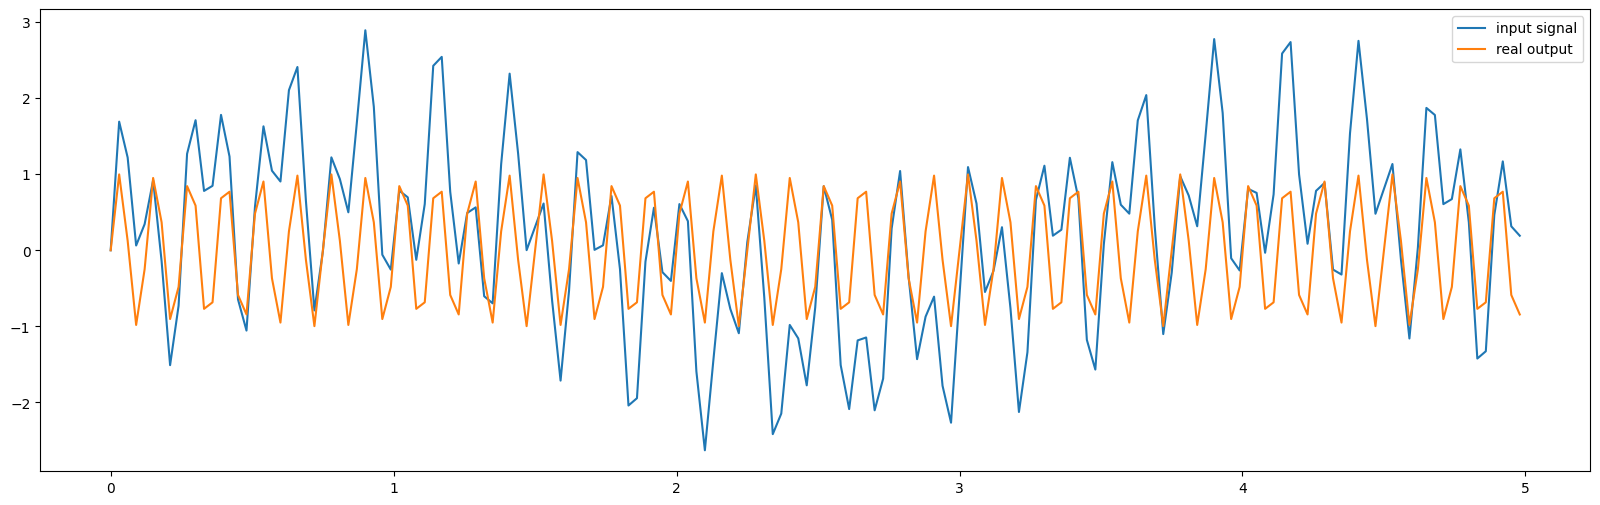

In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

matplotlib.rcParams['figure.figsize'] = (20, 6)

Duration = 5                                 #时长
T = 0.03                                     #采样周期   采样周期不同，滤波参数不同
t = np.arange(0.0, Duration, T)
f_1 = 0.3                                   #Low F Hz
x_1 = np.sin(2.0 * np.pi * f_1 * t)
f_2 = 8                                     #Mid F Hz
x_2 = np.sin(2.0 * np.pi * f_2 * t)
f_3 = 37                                    #High F Hz
x_3 = np.sin(2.0 * np.pi * f_3 * t)
mix_x=x_1+x_2+x_3

fig, ax = plt.subplots()
plt.plot(t, mix_x, label="input signal")
plt.plot(t, x_2, label="real output")
plt.legend()
plt.show()

##2. 画出波特图

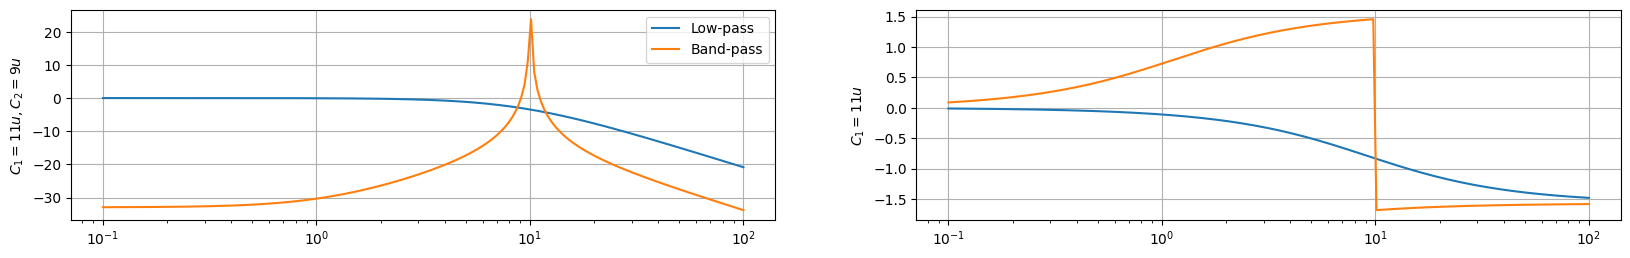

In [46]:
import scipy.signal as signal
R=10000
C1=11*pow(10,-6)
C2=9*pow(10,-6)

w, h = signal.freqs([1], [(R*C1),1])
w2, h2 = signal.freqs([R*(C1-C2), R*C2/4], [(R*C1*C2*R), 0, 1])

plt.subplot(2,2,1)
plt.semilogx(w, 20*np.log10(h), label='Low-pass')
plt.semilogx(w2, 20*np.log10(h2), label='Band-pass')
plt.grid()
plt.legend()
plt.ylabel("$C_1=11u,C_2=9u$")
plt.subplot(2,2,2)
plt.semilogx(w, np.unwrap(np.angle(h)),label='Low-pass')
plt.semilogx(w2, np.unwrap(np.angle(h2)), label='Band-pass')
plt.grid()
plt.ylabel("$C_1=11u$")
plt.show()


0.9516990007582699 0.22313016014842973 1.0800005334488105e-10
0.7613003866968737 0.23869961330312628


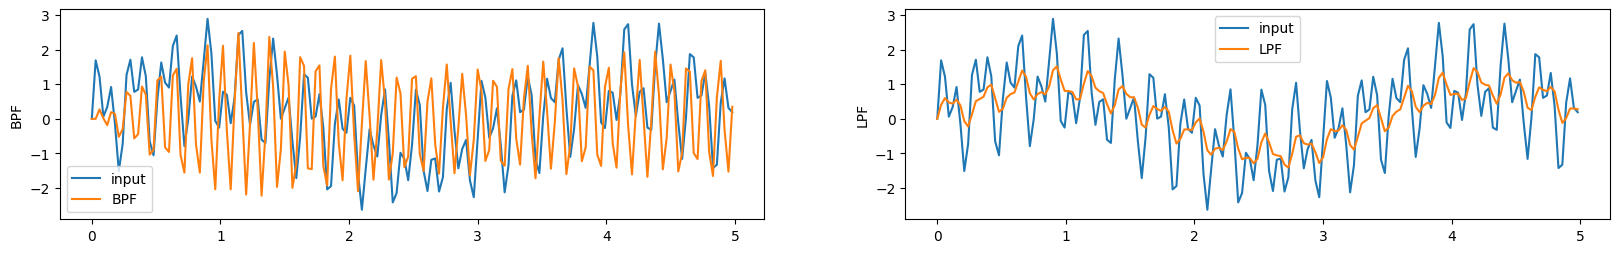

In [47]:
def BPF(x, R, C1, C2):
  omeg=T*2*np.pi
  y=np.zeros(len(x))
  alpha2=1-np.exp(-T/(R*R*C1*C2))
  alpha1=np.exp(-T/(R*(C1-C2)))
  beta=1-np.exp(-(4*T/R*(C2)))
  print(alpha2,alpha1, beta)
  y[0]=x[0]
  y[1]=y[1]
  for i in range(2, len(x)):
     y[i]=-alpha2*y[i-2]+0*y[i-1]+(beta)*x[i-1]+alpha1*x[i]
  return y

def LPF(x, R, C1, C2):
  omeg=T*2*np.pi
  y=np.zeros(len(x))
  alpha1=np.exp(-T/(R*C1))
  beta=1-alpha1
  print(alpha1, beta)
  y[0]=x[0]
  for i in range(1, len(x)):
     y[i]=alpha1*y[i-1]+beta*x[i]
  return y



#mix_x=0.4*x_1+0.5*x_2+0.3*x_3
out_y=BPF(mix_x,R,C1,C2)
out_y1=LPF(mix_x,R,C1,C2)

plt.subplot(2,2,1)
plt.plot(t, mix_x, label='input')
plt.plot(t, out_y, label='BPF')
plt.legend()
plt.ylabel("BPF")
plt.subplot(2,2,2)
plt.plot(t, mix_x, label='input')
plt.plot(t, out_y1, label='LPF')
plt.legend()
plt.ylabel("LPF")
plt.show()

